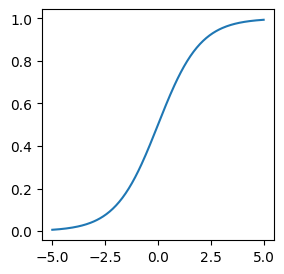

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1+np.exp(-z))
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,sigmoid(z))
plt.show()

In [2]:
import tensorflow as tf

dense = tf.keras.layers.Dense(50,activation='relu',
                              kernel_initializer='he_normal')

In [3]:
he_avg_int = tf.keras.initializers.VarianceScaling(scale=2,mode='fan_avg',
                                                   distribution='uniform')
dense = tf.keras.layers.Dense(50,activation='sigmoid',
                              kernel_initializer=he_avg_int)

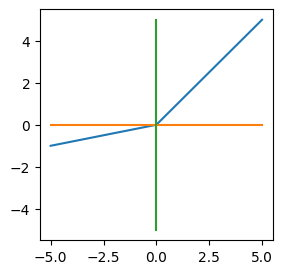

In [4]:
def leaky_relu(z,alpha):
    return np.maximum(alpha * z,z)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,leaky_relu(z,0.2))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

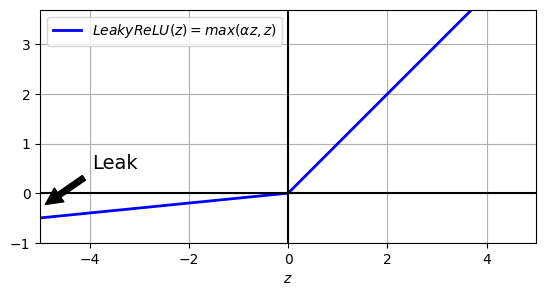

In [5]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In [6]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2) #default alpha = 0.3
dense = tf.keras.layers.Dense(50,activation=leaky_relu,
                              kernel_initializer='he_normal')

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50,kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.2)
])

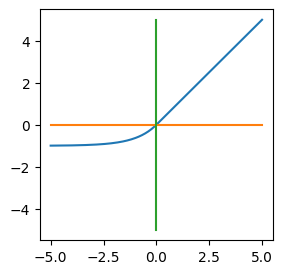

In [8]:
def elu(z,alpha=1):
    return np.where(z<0,alpha * (np.exp(z)-1),z)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,elu(z))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

In [9]:
dense = tf.keras.layers.Dense(50,activation='elu',kernel_initializer='he_normal')

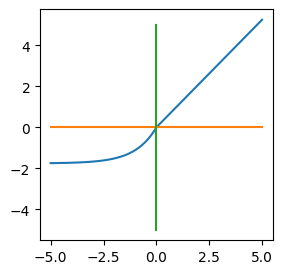

In [10]:
from scipy.special import erfc
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)
def selu(z,scale=scale_0_1,alpha=alpha_0_1):
    return scale * elu(z,alpha)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,selu(z))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

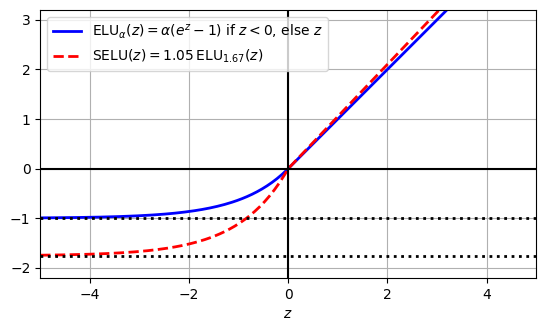

In [11]:
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In [12]:
dense = tf.keras.layers.Dense(50, activation='selu',
                              kernel_initializer='lecun_normal')

In [13]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation='selu',
                                    kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,10

 Total params: 1,079,410 (4.12 MB)

 Trainable params: 1,079,410 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test = X_train/255,X_valid/255,X_test/255

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
pixel_means = X_train.mean(axis=0,keepdims=True)
pixel_stds = X_train.std(axis=0,keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [19]:
history = model.fit(X_train_scaled,y_train,epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5056 - loss: 1.3123 - val_accuracy: 0.5646 - val_loss: 1.1442
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6418 - loss: 0.9642 - val_accuracy: 0.7354 - val_loss: 0.7431
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7245 - loss: 0.7643 - val_accuracy: 0.7622 - val_loss: 0.6772
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7568 - loss: 0.6712 - val_accuracy: 0.7836 - val_loss: 0.6119
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7478 - loss: 0.6918 - val_accuracy: 0.7690 - val_loss: 0.6623


In [20]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2484 - loss: 1.8676 - val_accuracy: 0.4424 - val_loss: 1.4667
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4815 - loss: 1.2632 - val_accuracy: 0.6058 - val_loss: 1.0038
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6073 - loss: 0.9830 - val_accuracy: 0.6582 - val_loss: 0.8937
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6878 - loss: 0.8001 - val_accuracy: 0.7290 - val_loss: 0.7582
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7393 - loss: 0.6940 - val_accuracy: 0.7536 - val_loss: 0.6968


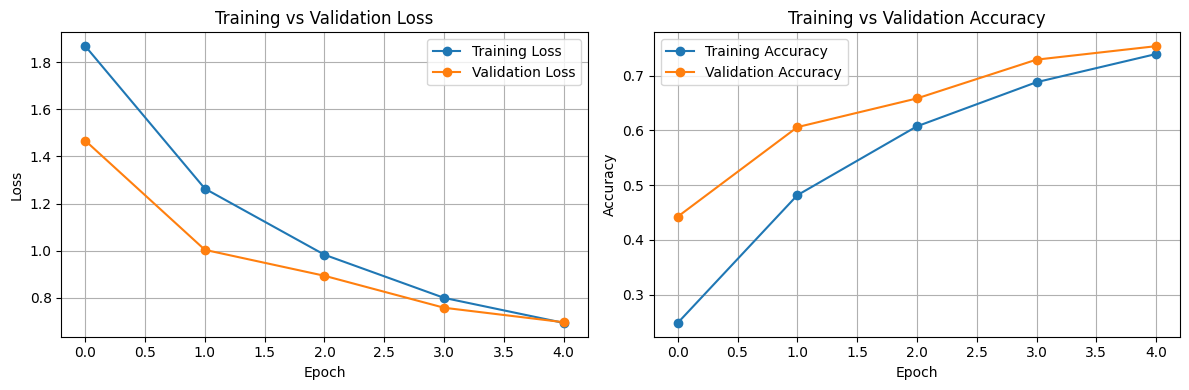

In [23]:
# Plot Training vs Validation Loss
plt.figure(figsize=(12, 4))

# ---- LOSS ----
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# ---- ACCURACY ----
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

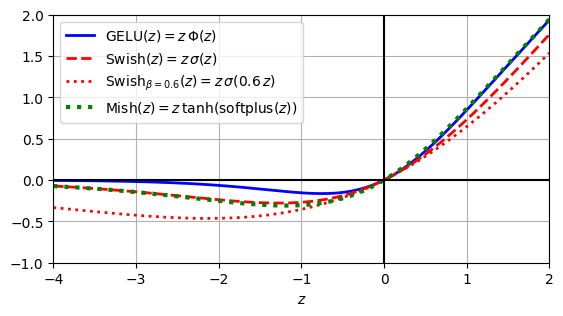

In [24]:
def swish(z,beta=1):
    return z * sigmoid(beta*z)
def approx_gelu(z):
    return swish(z,beta=1.702)
def softplus(z):
    return np.log(1+np.exp(z))
def mish(z):
    return z * np.tanh(softplus(z))
z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

plt.show()

In [25]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [28]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8057 - loss: 0.5600 - val_accuracy: 0.8528 - val_loss: 0.3980
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8608 - loss: 0.3959 - val_accuracy: 0.8616 - val_loss: 0.3655


In [30]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,
          validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7980 - loss: 0.6047 - val_accuracy: 0.8444 - val_loss: 0.4297
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8532 - loss: 0.4211 - val_accuracy: 0.8568 - val_loss: 0.3849


In [33]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [34]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [35]:
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8713 - loss: 0.3677 - val_accuracy: 0.8660 - val_loss: 0.3619
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8789 - loss: 0.3442 - val_accuracy: 0.8696 - val_loss: 0.3542


In [36]:
pos_class_id = class_names.index('Pullover')
neg_class_id = class_names.index('T-shirt/top')

def split_dataset(X,y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id,pos_class_id]))
    for old_class_id,new_class_id in zip(old_class_ids,range(8)):
        y_A[y_A == old_class_id] = new_class_id
    return ((X[~y_for_B],y_A),(X[y_for_B],y_B))

(X_train_A,y_train_A),(X_train_B,y_train_B) = split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B) = split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B) = split_dataset(X_test,y_test)

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8,activation='softmax')
])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history = model.fit(X_train_A,y_train_A,epochs=20,
                    validation_data=(X_valid_A,y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8038 - loss: 0.5878 - val_accuracy: 0.9052 - val_loss: 0.2761
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9035 - loss: 0.2786 - val_accuracy: 0.9143 - val_loss: 0.2426
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9170 - loss: 0.2412 - val_accuracy: 0.9185 - val_loss: 0.2296
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9251 - loss: 0.2184 - val_accuracy: 0.9230 - val_loss: 0.2229
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9312 - loss: 0.2014 - val_accuracy: 0.9240 - val_loss: 0.2179
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9365 - loss: 0.1873 - val_accuracy: 0.9253 - val_loss: 0.2145
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9405 - loss: 0.1753 - val_accuracy: 0.9265 - val_loss: 0.2120
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9451 - loss: 0.1646 - 

In [37]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history = model_B.fit(X_train_B,y_train_B,epochs=20,
                      validation_data=(X_valid_B,y_valid_B))
model_B.evaluate(X_test_B,y_test_B)

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8921 - loss: 0.4063 - val_accuracy: 0.9456 - val_loss: 0.2563
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9499 - loss: 0.2119 - val_accuracy: 0.9545 - val_loss: 0.1781
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9530 - loss: 0.1682 - val_accuracy: 0.9565 - val_loss: 0.1528
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9548 - loss: 0.1516 - val_accuracy: 0.9545 - val_loss: 0.1411
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9557 - loss: 0.1430 - val_accuracy: 0.9535 - val_loss: 0.1345
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9569 - loss: 0.1375 - val_accuracy: 0.9555 - val_loss: 0.1299
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9579 - loss: 0.1336 - val_accuracy: 0.9604 - val_loss: 0.1265
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9588 - loss: 0.1305 - val_accuracy: 0.

[0.11944156885147095, 0.9605000019073486]

In [38]:
model_A = tf.keras.models.load_model('my_model_A.keras')
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [39]:
tf.random.set_seed(42)

In [40]:
model_A_clone =tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [41]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [42]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])

In [43]:
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=4,
                           validation_data=(X_valid_B,y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=16,
                           validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6076 - loss: 0.6730 - val_accuracy: 0.6805 - val_loss: 0.6513
Epoch 2/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7333 - loss: 0.6368 - val_accuracy: 0.7873 - val_loss: 0.6209
Epoch 3/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8164 - loss: 0.6074 - val_accuracy: 0.8516 - val_loss: 0.5938
Epoch 4/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8609 - loss: 0.5812 - val_accuracy: 0.8823 - val_loss: 0.5693
Epoch 1/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9373 - loss: 0.3447 - val_accuracy: 0.9505 - val_loss: 0.2253
Epoch 2/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9503 - loss: 0.1976 - val_accuracy: 0.9565 - val_loss: 0.1678
Epoch 3/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9538 - loss: 0.1635 - val_accuracy: 0.9555 - val_loss: 0.1477
Epoch 4/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9543 - loss: 0.1490 - val_accuracy: 0.9575

In [44]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9585 - loss: 0.1247  


[0.12469767779111862, 0.9585000276565552]

In [45]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28,28]),
        tf.keras.layers.Dense(100,activation='relu',
                              kernel_initializer='he_normal'),
        tf.keras.layers.Dense(100,activation='relu',
                        kernel_initializer='he_normal'),
        tf.keras.layers.Dense(100,activation='relu',
                        kernel_initializer='he_normal'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
                  metrics=['accuracy'])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid,y_valid))

In [46]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [47]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5677 - loss: 1.3876 - val_accuracy: 0.7220 - val_loss: 0.9083
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7348 - loss: 0.8039 - val_accuracy: 0.7684 - val_loss: 0.7056
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7744 - loss: 0.6765 - val_accuracy: 0.7940 - val_loss: 0.6232
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7950 - loss: 0.6106 - val_accuracy: 0.8054 - val_loss: 0.5737
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8072 - loss: 0.5681 - val_accuracy: 0.8124 - val_loss: 0.5421
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8147 - loss: 0.5390 - val_accuracy: 0.8180 - val_loss: 0.5196
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8212 - loss: 0.5174 - val_accuracy: 0.8212 - val_loss: 0.5023
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8264 - loss: 0.5005 - 

In [48]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [49]:
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7532 - loss: 0.7237 - val_accuracy: 0.8184 - val_loss: 0.5057
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8357 - loss: 0.4707 - val_accuracy: 0.8358 - val_loss: 0.4526
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8507 - loss: 0.4254 - val_accuracy: 0.8476 - val_loss: 0.4185
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8610 - loss: 0.3969 - val_accuracy: 0.8564 - val_loss: 0.3975
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8673 - loss: 0.3760 - val_accuracy: 0.8576 - val_loss: 0.3837
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8730 - loss: 0.3591 - val_accuracy: 0.8606 - val_loss: 0.3766
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8771 - loss: 0.3457 - val_accuracy: 0.8624 - val_loss: 0.3743
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8803 - loss: 0.3340 - 

In [50]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [51]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7680 - loss: 0.6797 - val_accuracy: 0.8268 - val_loss: 0.4843
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8389 - loss: 0.4620 - val_accuracy: 0.8452 - val_loss: 0.4338
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8529 - loss: 0.4202 - val_accuracy: 0.8516 - val_loss: 0.4100
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8623 - loss: 0.3943 - val_accuracy: 0.8578 - val_loss: 0.3945
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8679 - loss: 0.3748 - val_accuracy: 0.8620 - val_loss: 0.3822
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8735 - loss: 0.3589 - val_accuracy: 0.8668 - val_loss: 0.3714
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8779 - loss: 0.3455 - val_accuracy: 0.8682 - val_loss: 0.3614
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8813 - loss: 0.3335 - 

In [52]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [53]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6930 - loss: 0.9623 - val_accuracy: 0.7810 - val_loss: 0.6591
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7936 - loss: 0.6180 - val_accuracy: 0.8110 - val_loss: 0.5694
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8133 - loss: 0.5561 - val_accuracy: 0.8196 - val_loss: 0.5294
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8234 - loss: 0.5235 - val_accuracy: 0.8270 - val_loss: 0.5057
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8292 - loss: 0.5022 - val_accuracy: 0.8300 - val_loss: 0.4890
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8332 - loss: 0.4868 - val_accuracy: 0.8340 - val_loss: 0.4768
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8369 - loss: 0.4747 - val_accuracy: 0.8366 - val_loss: 0.4671
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8399 - loss: 0.4649 - 

In [54]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)

In [55]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8137 - loss: 0.5160 - val_accuracy: 0.8370 - val_loss: 0.4363
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8604 - loss: 0.3870 - val_accuracy: 0.8548 - val_loss: 0.3958
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8714 - loss: 0.3590 - val_accuracy: 0.8572 - val_loss: 0.4216
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8769 - loss: 0.3511 - val_accuracy: 0.8498 - val_loss: 0.4541
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8795 - loss: 0.3454 - val_accuracy: 0.8404 - val_loss: 0.5193
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8817 - loss: 0.3429 - val_accuracy: 0.8506 - val_loss: 0.4636
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8840 - loss: 0.3400 - val_accuracy: 0.8540 - val_loss: 0.5111
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8858 - loss: 0.3345 - 

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [57]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8211 - loss: 0.4992 - val_accuracy: 0.8328 - val_loss: 0.4235
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8633 - loss: 0.3731 - val_accuracy: 0.8364 - val_loss: 0.4114
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8763 - loss: 0.3368 - val_accuracy: 0.8514 - val_loss: 0.3856
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8839 - loss: 0.3140 - val_accuracy: 0.8594 - val_loss: 0.3623
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8892 - loss: 0.2966 - val_accuracy: 0.8608 - val_loss: 0.3994
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8960 - loss: 0.2806 - val_accuracy: 0.8612 - val_loss: 0.3909
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8997 - loss: 0.2675 - val_accuracy: 0.8726 - val_loss: 0.3592
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9046 - loss: 0.2557 - 

In [58]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,
                                       beta_2=0.999)

In [59]:
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8171 - loss: 0.5319 - val_accuracy: 0.8372 - val_loss: 0.4325
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8581 - loss: 0.3982 - val_accuracy: 0.8576 - val_loss: 0.3828
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8718 - loss: 0.3579 - val_accuracy: 0.8664 - val_loss: 0.3605
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8804 - loss: 0.3317 - val_accuracy: 0.8704 - val_loss: 0.3500
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8865 - loss: 0.3124 - val_accuracy: 0.8700 - val_loss: 0.3465
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8926 - loss: 0.2956 - val_accuracy: 0.8750 - val_loss: 0.3398
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8979 - loss: 0.2822 - val_accuracy: 0.8730 - val_loss: 0.3420
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9019 - loss: 0.2702 - 

In [60]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                      beta_2=0.999)

In [61]:
history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8281 - loss: 0.4835 - val_accuracy: 0.8416 - val_loss: 0.4169
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8653 - loss: 0.3676 - val_accuracy: 0.8448 - val_loss: 0.4025
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8782 - loss: 0.3325 - val_accuracy: 0.8494 - val_loss: 0.3845
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8856 - loss: 0.3095 - val_accuracy: 0.8498 - val_loss: 0.3922
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8923 - loss: 0.2907 - val_accuracy: 0.8612 - val_loss: 0.3797
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8984 - loss: 0.2755 - val_accuracy: 0.8600 - val_loss: 0.3875
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9022 - loss: 0.2619 - val_accuracy: 0.8610 - val_loss: 0.3889
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9060 - loss: 0.2512 - 

In [62]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5,learning_rate=0.001,
                                      beta_1=0.9,beta_2=0.999)

In [63]:
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8215 - loss: 0.4981 - val_accuracy: 0.8322 - val_loss: 0.4219
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8639 - loss: 0.3727 - val_accuracy: 0.8468 - val_loss: 0.3967
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8766 - loss: 0.3348 - val_accuracy: 0.8546 - val_loss: 0.3814
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8838 - loss: 0.3123 - val_accuracy: 0.8684 - val_loss: 0.3484
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8909 - loss: 0.2938 - val_accuracy: 0.8660 - val_loss: 0.3537
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8952 - loss: 0.2796 - val_accuracy: 0.8774 - val_loss: 0.3343
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9003 - loss: 0.2664 - val_accuracy: 0.8696 - val_loss: 0.3539
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9037 - loss: 0.2565 - 

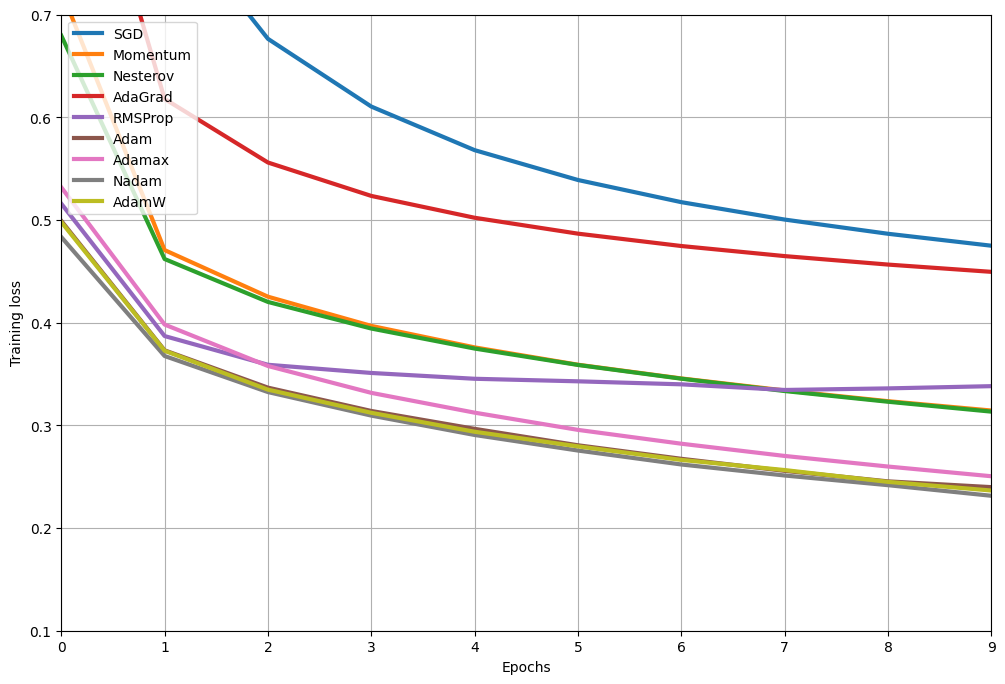

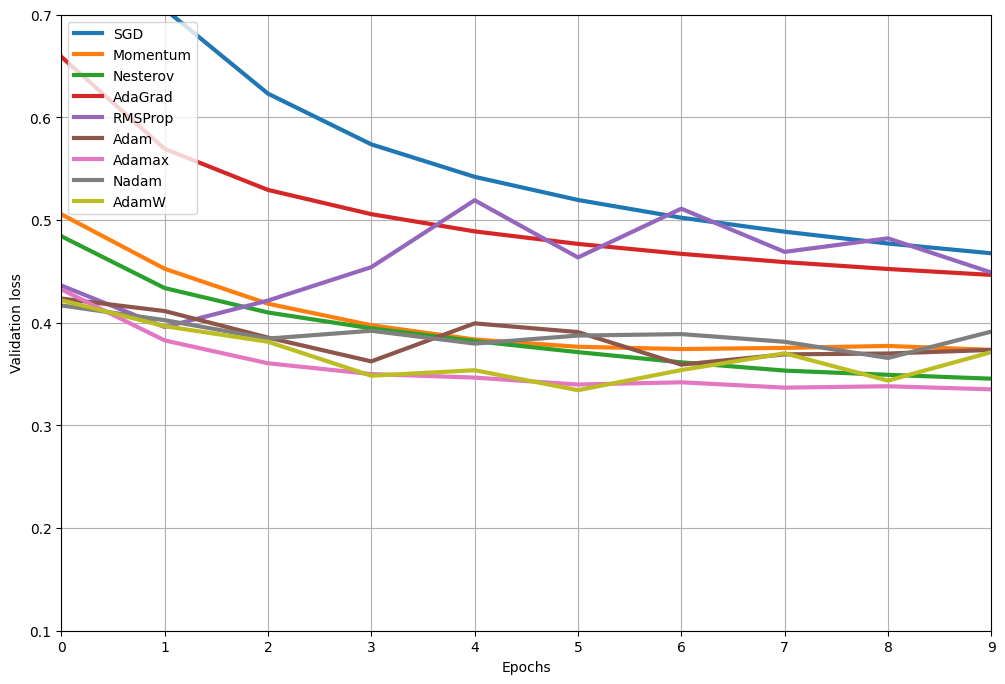

In [64]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

In [65]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10_000,
    decay_rate = 1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

In [66]:
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7598 - loss: 0.6965 - val_accuracy: 0.8194 - val_loss: 0.5079
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8335 - loss: 0.4739 - val_accuracy: 0.8342 - val_loss: 0.4555
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8490 - loss: 0.4284 - val_accuracy: 0.8414 - val_loss: 0.4320
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8577 - loss: 0.4026 - val_accuracy: 0.8458 - val_loss: 0.4173
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8636 - loss: 0.3850 - val_accuracy: 0.8510 - val_loss: 0.4047
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8673 - loss: 0.3720 - val_accuracy: 0.8556 - val_loss: 0.3949
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8715 - loss: 0.3615 - val_accuracy: 0.8592 - val_loss: 0.3858
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8740 - loss: 0.3530 - 

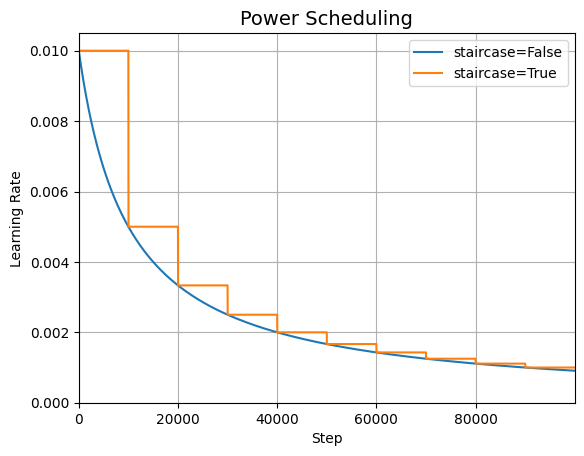

In [67]:
initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [68]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 20_000,
    decay_rate = 0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [69]:
history_exponential_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7630 - loss: 0.6941 - val_accuracy: 0.8212 - val_loss: 0.4934
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8348 - loss: 0.4722 - val_accuracy: 0.8380 - val_loss: 0.4488
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8496 - loss: 0.4276 - val_accuracy: 0.8456 - val_loss: 0.4246
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8582 - loss: 0.4030 - val_accuracy: 0.8500 - val_loss: 0.4088
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8637 - loss: 0.3864 - val_accuracy: 0.8536 - val_loss: 0.3957
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8678 - loss: 0.3745 - val_accuracy: 0.8578 - val_loss: 0.3855
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8711 - loss: 0.3654 - val_accuracy: 0.8610 - val_loss: 0.3781
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8735 - loss: 0.3583 - 

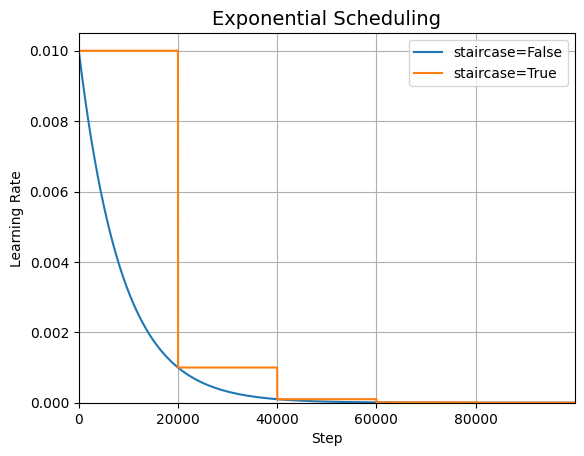

In [70]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [71]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

In [72]:
def exponential_decay(lr0,s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn
exponential_decay_fn = exponential_decay(lr0=0.01,s=20)

In [73]:
tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])

In [74]:
n_epochs = 20

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data = (X_valid,y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7645 - loss: 0.6914 - val_accuracy: 0.8284 - val_loss: 0.4843 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8343 - loss: 0.4691 - val_accuracy: 0.8384 - val_loss: 0.4385 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8506 - loss: 0.4216 - val_accuracy: 0.8478 - val_loss: 0.4164 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8604 - loss: 0.3948 - val_accuracy: 0.8542 - val_loss: 0.4022 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8664 - loss: 0.3767 - val_accuracy: 0.8578 - val_loss: 0.3902 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8709 - loss: 0.3629 - val_accuracy: 0.8596 - val_loss: 0.3817 - learning_rate: 0.0056
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8751 - l

In [75]:
def exponential_decay_fn(epoch,lr):
    return lr * 0.1 ** (1/20)

In [76]:
K = tf.keras.backend

class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self,n_steps=40_000):
        super().__init__()
        self.n_steps = n_steps
    
    def on_batch_begin(self, batch, logs = None):
        # Batch argument is reset at every epoch
        lr = self.model.optimizer.learning_rate.numpy()
        new_learning_rate = lr * 0.1 ** (1/self.n_steps)
        self.model.optimizer.learning_rate = new_learning_rate
    
    def on_epoch_end(self, epoch, logs = None):
        logs = logs or {}
        logs['lr'] = self.model.optimizer.learning_rate.numpy()

In [77]:
lr0 = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate = lr0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])

In [78]:
import math

batch_size = 32
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)
history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data = (X_valid,y_valid),
                    callbacks=[exp_decay])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7613 - loss: 0.6885 - val_accuracy: 0.8280 - val_loss: 0.4913 - lr: 0.0089
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8332 - loss: 0.4723 - val_accuracy: 0.8414 - val_loss: 0.4477 - lr: 0.0079
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8489 - loss: 0.4270 - val_accuracy: 0.8466 - val_loss: 0.4279 - lr: 0.0071
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8577 - loss: 0.4004 - val_accuracy: 0.8508 - val_loss: 0.4126 - lr: 0.0063
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8642 - loss: 0.3821 - val_accuracy: 0.8564 - val_loss: 0.3981 - lr: 0.0056
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8687 - loss: 0.3684 - val_accuracy: 0.8600 - val_loss: 0.3880 - lr: 0.0050
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8731 - loss: 0.3574 - val_accuracy: 0.8646 - val_loss: 0.3799 - lr: 0.0045

In [79]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries = [50_000 * n_epochs // batch_size, 80_000 * n_epochs // batch_size],
    values = [0.01, 0.005, 0.001]
)
optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

In [80]:
history_piecewise_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7710 - loss: 0.6726 - val_accuracy: 0.8308 - val_loss: 0.4769
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8373 - loss: 0.4655 - val_accuracy: 0.8330 - val_loss: 0.4423
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8516 - loss: 0.4219 - val_accuracy: 0.8434 - val_loss: 0.4261
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8597 - loss: 0.3953 - val_accuracy: 0.8496 - val_loss: 0.4103
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8661 - loss: 0.3758 - val_accuracy: 0.8534 - val_loss: 0.4007
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8707 - loss: 0.3602 - val_accuracy: 0.8542 - val_loss: 0.3927
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 0.3470 - val_accuracy: 0.8566 - val_loss: 0.3876
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8789 - loss: 0.3356 - 

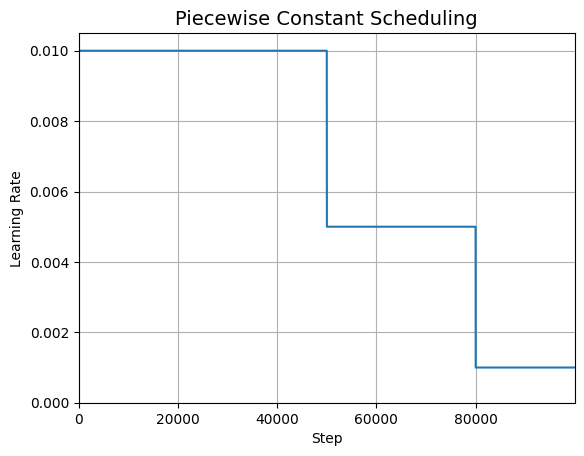

In [81]:
boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [82]:
def piecewise_constant_fn(epoch):
    if epoch > 5:
        return 0.01
    if epoch < 15:
        return 0.005
    else:
        return 0.001

In [83]:
def piecewise_constant(boundaries,values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[(boundaries > epoch).argmax() - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [84]:
n_epochs = 25

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = build_model()
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data = (X_valid,y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8091 - loss: 0.5418 - val_accuracy: 0.7884 - val_loss: 0.5404 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8421 - loss: 0.4520 - val_accuracy: 0.8060 - val_loss: 0.5942 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8511 - loss: 0.4269 - val_accuracy: 0.8180 - val_loss: 0.5142 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8551 - loss: 0.4144 - val_accuracy: 0.8338 - val_loss: 0.4561 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8550 - loss: 0.4142 - val_accuracy: 0.8488 - val_loss: 0.4111 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8732 - loss: 0.3555 - val_accuracy: 0.8510 - val_loss: 0.3997 - learning_rate: 0.0050
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8751 - l

In [85]:
for name in sorted(dir(tf.keras.optimizers.schedules)):
    if name[0] == name[0].lower():  # must start with capital letter
        continue
    scheduler_class = getattr(tf.keras.optimizers.schedules, name)
    print(f"• {name} – {scheduler_class.__doc__.splitlines()[0]}")

• CosineDecay – A `LearningRateSchedule` that uses a cosine decay with optional warmup.
• CosineDecayRestarts – A `LearningRateSchedule` that uses a cosine decay schedule with restarts.
• ExponentialDecay – A `LearningRateSchedule` that uses an exponential decay schedule.
• InverseTimeDecay – A `LearningRateSchedule` that uses an inverse time decay schedule.
• LearningRateSchedule – The learning rate schedule base class.
• PiecewiseConstantDecay – A `LearningRateSchedule` that uses a piecewise constant decay schedule.
• PolynomialDecay – A `LearningRateSchedule` that uses a polynomial decay schedule.


In [86]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])

In [87]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)
history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data=(X_valid,y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7627 - loss: 0.6967 - val_accuracy: 0.8264 - val_loss: 0.4874 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8335 - loss: 0.4714 - val_accuracy: 0.8428 - val_loss: 0.4376 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8501 - loss: 0.4244 - val_accuracy: 0.8506 - val_loss: 0.4129 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8594 - loss: 0.3959 - val_accuracy: 0.8550 - val_loss: 0.3966 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8655 - loss: 0.3756 - val_accuracy: 0.8622 - val_loss: 0.3858 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8699 - loss: 0.3602 - val_accuracy: 0.8660 - val_loss: 0.3729 - learning_rate: 0.0100
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - l

In [88]:
import math

batch_size = 32
n_epochs = 25
n_steps = n_epochs*math.ceil(len(X_train) / batch_size)
scheduled_learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,decay_steps=n_steps,decay_rate=0.1)
optimizer = tf.keras.optimizers.SGD(learning_rate = scheduled_learning_rate)

In [89]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0
    
    def on_batch_end(self,batch,logs = None):
        mean_epoch_loss = logs['loss']
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        lr = self.model.optimizer.learning_rate.numpy()
        self.rates.append(lr)
        self.losses.append(batch_loss)
        self.model.optimizer.learning_rate = lr * self.factor

In [90]:
def find_learning_rate(model,X,y,epochs=1,batch_size=32,min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X)/batch_size)*epochs
    factor = (max_rate/min_rate) ** (1/iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    model.optimizer.learning_rate = min_rate
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X,y,epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    model.optimizer.learning_rate = init_lr
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [91]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

In [92]:
model = build_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3808 - loss: 1.8053


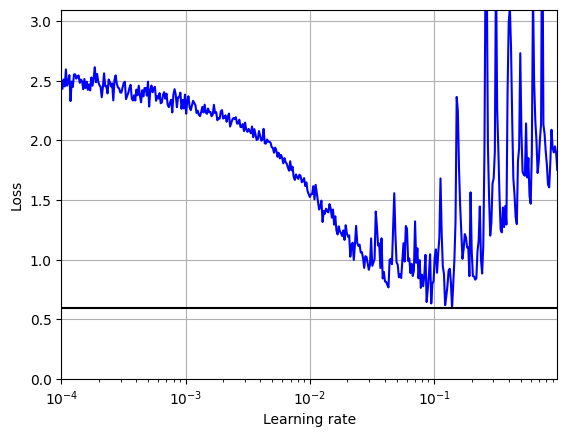

In [93]:
batch_size=128
rates,losses = find_learning_rate(model,X_train,y_train,epochs=1,
                                  batch_size=batch_size)
plot_lr_vs_loss(rates,losses)

In [94]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        self.model.optimizer.learning_rate = lr

In [95]:
model = build_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train)/batch_size) * n_epochs,
                             max_lr = 0.1)

history = model.fit(X_train,y_train,epochs=n_epochs,batch_size = batch_size,
                    validation_data=(X_valid,y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6801 - loss: 0.9616 - val_accuracy: 0.7992 - val_loss: 0.6035
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7998 - loss: 0.5779 - val_accuracy: 0.8142 - val_loss: 0.5294
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8242 - loss: 0.5017 - val_accuracy: 0.8156 - val_loss: 0.5117
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8377 - loss: 0.4564 - val_accuracy: 0.8146 - val_loss: 0.4968
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.4236 - val_accuracy: 0.8264 - val_loss: 0.4702
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8558 - loss: 0.3991 - val_accuracy: 0.8348 - val_loss: 0.4511
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8619 - loss: 0.3797 - val_accuracy: 0.8392 - val_loss: 0.4426
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8676 - loss: 0.3636 - val_accuracy: 0.

In [96]:
layers = tf.keras.layers.Dense(100,activation='relu',
                               kernel_initializer='he_normal',
                               kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [97]:
tf.random.set_seed(42)

In [98]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax",
                     kernel_initializer="glorot_normal")  # not in the book
])

In [99]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=2,
                    validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7689 - loss: 3.1243 - val_accuracy: 0.8196 - val_loss: 1.8630
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8112 - loss: 1.4281 - val_accuracy: 0.8234 - val_loss: 1.1189


In [100]:
tf.random.set_seed(42)

In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [102]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7520 - loss: 0.6763 - val_accuracy: 0.8334 - val_loss: 0.4390
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8120 - loss: 0.5129 - val_accuracy: 0.8452 - val_loss: 0.4097
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8262 - loss: 0.4742 - val_accuracy: 0.8548 - val_loss: 0.3945
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8323 - loss: 0.4545 - val_accuracy: 0.8572 - val_loss: 0.3827
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8393 - loss: 0.4353 - val_accuracy: 0.8584 - val_loss: 0.3753
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8435 - loss: 0.4239 - val_accuracy: 0.8660 - val_loss: 0.3588
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8479 - loss: 0.4127 - val_accuracy: 0.8658 - val_loss: 0.3594
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8517 - loss: 0.4048 - 

In [103]:
model.evaluate(X_train,y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.8788 - loss: 0.3207


[0.3207440972328186, 0.878781795501709]

In [104]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8585 - loss: 0.3793


[0.3793170750141144, 0.8585000038146973]

In [105]:
model.evaluate(X_valid,y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8668 - loss: 0.3519


[0.3519408404827118, 0.8668000102043152]

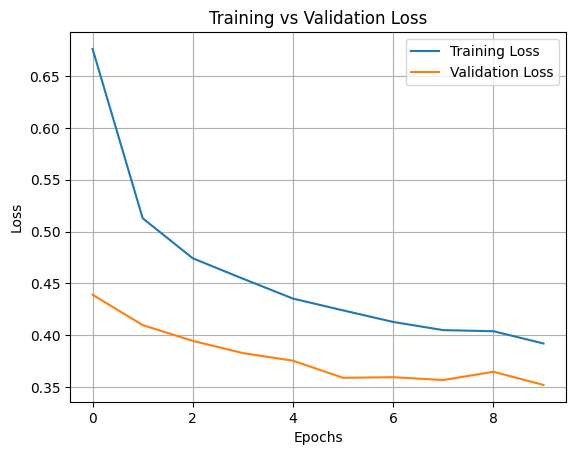

In [106]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\utkar\AppData\Local\Temp\ipykernel_18700\2957666783.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


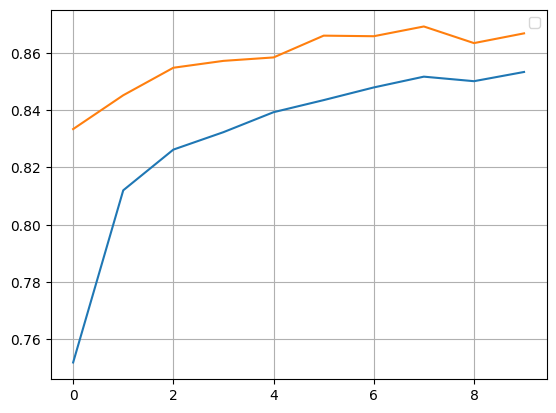

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend()
plt.grid(True)
plt.show()

In [108]:
import numpy as np

y_probas = np.stack([model(X_test, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [109]:
model.predict(X_test[:1].round(3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[3.2524483e-07, 3.7077487e-07, 6.6627484e-07, 1.3448125e-06,
        1.9852774e-07, 9.9351443e-02, 1.3131453e-06, 4.8677310e-02,
        2.0638452e-06, 8.5196495e-01]], dtype=float32)

In [110]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.174, 0.   , 0.077, 0.   ,
       0.748], dtype=float32)

In [111]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.   , 0.   , 0.   , 0.001, 0.   , 0.218, 0.   , 0.107, 0.003,
       0.223], dtype=float32)

In [112]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum()/len(y_test)
accuracy

np.float64(0.8566)

In [113]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self,inputs,training=None):
        return super().call(inputs,training=True)

In [118]:
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer,Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [119]:
mc_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout (MCDropout)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_1 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_2 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
         for sample in range(100)], axis=0).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.07, 0.  , 0.73]],
      dtype=float32)

In [122]:
dense = tf.keras.layers.Dense(
    100, activation='relu',kernel_initializer='he_normal',
    kernel_constraint=tf.keras.constraints.max_norm(1.)
)

In [123]:
MaxNormDense = partial(tf.keras.layers.Dense,
                       activation='relu',kernel_initializer='he_normal',
                       kernel_constraint=tf.keras.constraints.max_norm(1.))
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10,activation='softmax')
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,
                    validation_data=(X_valid,y_valid))

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7753 - loss: 0.6653 - val_accuracy: 0.8318 - val_loss: 0.4879
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8372 - loss: 0.4634 - val_accuracy: 0.8402 - val_loss: 0.4469
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8518 - loss: 0.4204 - val_accuracy: 0.8434 - val_loss: 0.4206
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8602 - loss: 0.3931 - val_accuracy: 0.8492 - val_loss: 0.4058
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8665 - loss: 0.3733 - val_accuracy: 0.8516 - val_loss: 0.3969
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8712 - loss: 0.3575 - val_accuracy: 0.8556 - val_loss: 0.3852
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8760 - loss: 0.3442 - val_accuracy: 0.8592 - val_loss: 0.3779
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8793 - loss: 0.3329 - 